# Firefighter Fatalities Investigation

This Jupyter Notebook investigates firefighter fatalities from a public dataset provided by the Federal Emergency Management Agency (FEMA). The U.S. Fire Administration tracks and collects information on the causes of on-duty firefighter fatalities that occur in the United States. This dataset contains this collected data which is hosted on the FEMA website. Below is the current link for this dataset as of 09/18/2020.

Link: https://apps.usfa.fema.gov/firefighter-fatalities/

## Motivation For Investigation

My personal motivation for investigating this dataset is because I want to, in the near future, become a volunteer firefighter myself. I find firefighting to be such a rewarding way to give back to the community around me and hope to become a part of this community someday. Thus, I think it would be useful to have some background knowledge regarding firefighting prior to enrolling as a volunteer firefighter. This dataset provides me one way to do this by becoming better equiped to knowing the analysis of firefighters deaths with the hope that one day this knowledge could help prevent a future firefighter death whether it be a fellow firefighter or myself.

## Introductory Analysis

Below analysis on the dataset starts by importing the needed python libraries and dataset into this Jupyter Notebook. This provides a fire glance into the what the dataset contains.

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [216]:
fire = pd.read_csv('ff_data.csv', encoding='latin1')
fire.head()

,Initial summary,First name,Last name,Middle name,Age,Rank,Classification,Incident date,Date of death,Cause of death,Nature of death,Activity,Emergency,Duty,Property type,Memorial fund info
0,Firefighter Pollard was driving a rescue vehic...,Robert,Pollard,Dale,64.0,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Cerebrovascular Accident,Riding Vehicle/Apparatus,Yes,Responding,Outdoor Property,NaN
1,Pump Operator/Inspector Purdy was operating a ...,Lee,Purdy,A.,57.0,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,On-Scene Fire,Residential,NaN
2,First Assistant Chief Osadacz was on the scene...,Ronald,Osadacz,J.,36.0,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,Responding,Street/Road,NaN
3,Firefighter Streeter responded to a trash and ...,Allen,Streeter,L.,58.0,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,On-Scene Fire,Outdoor Property,NaN
4,Firefighter Bankert was participating in fire ...,Gary,"Bankert, Sr",Lynn,37.0,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Caught or Trapped,Drowning,Other,No,Training,NaN,NaN


## First Steps

The first steps to gaining insight into this dataset is to clean things up a bit and ensure the quality of the data is what we are looking for. Some of the first steps done below include: renaming columns, checking for null values and removing unnessary columns.

In [217]:
columns = list(fire.columns)
fixed_columns = []

# format the column names
for col in columns:
    col = col.lower()
    col = col.replace(' ', '_')
    fixed_columns.append(col)

fire.columns = fixed_columns

#extra_columns = fire.loc[:, ['initial_summary', 'first_name', 'last_name', 'middle_name', 'memorial_fund_info']] # saved for later just in case
#fire = fire.drop(['initial_summary', 'first_name', 'last_name', 'middle_name', 'memorial_fund_info'], axis=1)
fire.head()

,initial_summary,first_name,last_name,middle_name,age,rank,classification,incident_date,date_of_death,cause_of_death,nature_of_death,activity,emergency,duty,property_type,memorial_fund_info
0,Firefighter Pollard was driving a rescue vehic...,Robert,Pollard,Dale,64.0,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Cerebrovascular Accident,Riding Vehicle/Apparatus,Yes,Responding,Outdoor Property,NaN
1,Pump Operator/Inspector Purdy was operating a ...,Lee,Purdy,A.,57.0,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,On-Scene Fire,Residential,NaN
2,First Assistant Chief Osadacz was on the scene...,Ronald,Osadacz,J.,36.0,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,Responding,Street/Road,NaN
3,Firefighter Streeter responded to a trash and ...,Allen,Streeter,L.,58.0,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,On-Scene Fire,Outdoor Property,NaN
4,Firefighter Bankert was participating in fire ...,Gary,"Bankert, Sr",Lynn,37.0,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Caught or Trapped,Drowning,Other,No,Training,NaN,NaN


In [218]:
fire.describe(include='all')

,initial_summary,first_name,last_name,middle_name,age,rank,classification,incident_date,date_of_death,cause_of_death,nature_of_death,activity,emergency,duty,property_type,memorial_fund_info
count,2291,2291,2291,2085,1931.000000,2284,2288,2290,2291,2278,2284,2274,2291,2285,2001,787
unique,1838,536,1899,525,NaN,285,8,1568,1579,13,12,23,2,7,11,589
top,"On September 11, 2001, terrorists attacked the...",Michael,Smith,J.,NaN,Firefighter,Career,"Sep 11, 2001","Sep 11, 2001",Stress/Overexertion,Heart Attack,Search and Rescue,Yes,On-Scene Fire,Store/Office,Pending
freq,203,102,21,102,NaN,1005,1055,343,343,985,907,434,1485,953,625,111
mean,NaN,NaN,NaN,NaN,46.779907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,14.511376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Initial Analysis

Right away we can learn a lot just from this quick summary of the data. First thing that we see from looking at the dates is that a large chunk of the deaths occured during the September 11 terrorist attacks. While this is an important statistic and insights could likely be found by analysizing this subset of data, it will be excluded from here on out because those deaths are what I would consider an anomaly within the data. That scale of fire or incident will likely not be experienced by most firefighters during their day-to-day career.

Another anomaly that I think is worth excluding from my analysis is that there are firefighters in this dataset under the age of eighteen. Eighteen years old is the standard requirement for joining a firefighting department and has been for quite sometime. But after looking into this a bit more I found that many departments have a youth volunteer program. The minimum age requirement for this is only fourteen years old, which explains the younger firefighter fatalities. So for now these will be included in the analysis since they would of been officially a part of the department technically, even if they fall under the subset of junior volunteers. More on the junior volunteer program can be found on the [National Volunteer Fire Council's website.](https://www.nvfc.org/wp-content/uploads/2016/08/juniorhandbook2ed.pdf)

In [219]:
# Convert strings to datetime format for simple access to date statistics
fire['date_of_death'] = pd.to_datetime(fire['date_of_death'], format = '%b %d, %Y')
fire['incident_date'] = pd.to_datetime(fire['incident_date'], format = '%b %d, %Y')

# Remove Incidents from 9/11
fire_911 = fire[fire['incident_date'] == '2001-09-11']

fatalities_total = len(fire.index)
fatalities_911 = len(fire_911.index)
print('The percent of fatalities on 9/11:', 100 * round(fatalities_911/fatalities_total, 2), '%')
fire = fire[fire['incident_date'] != '2001-09-11']

The percent of fatalities on 9/11: 15.0 %


#### Null Values

Within the __age__ column there are 360 counts of null values for the age column. It is a bit troubling that that many rows do not have information on the age, but we will do a little analysis to double check they are infact null and that there isn't a different missing column causing the null values.

In [220]:
null_age = fire['age'].isnull()
fire[null_age].head(2)

,initial_summary,first_name,last_name,middle_name,age,rank,classification,incident_date,date_of_death,cause_of_death,nature_of_death,activity,emergency,duty,property_type,memorial_fund_info
538,Firefighter/EMT Smith responded with other mem...,James,Smith,Timothy,NaN,Firefighter/EMT,Volunteer,1997-01-17,2001-10-06,Struck By,Other,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,On-Scene Fire,Residential,
548,Firefighter Hanson had just returned home afte...,James,Hanson,H.,NaN,Firefighter,Volunteer,2001-11-10,2001-11-10,Stress/Overexertion,Heart Attack,Other,Yes,Other On-Duty,Residential,


In [221]:
fire[null_age].tail(2)

,initial_summary,first_name,last_name,middle_name,age,rank,classification,incident_date,date_of_death,cause_of_death,nature_of_death,activity,emergency,duty,property_type,memorial_fund_info
1586,"Chief Tieche worked a full day on May 27, 2011...",Robert,Tieche,J,NaN,Fire Chief,Career,2011-05-28,2011-05-28,Stress/Overexertion,Heart Attack,Other,No,After,NaN,NaN
1628,Firefighter/EMT Adair was driving to work. Sh...,Charolette,Adair,Rae,NaN,Firefighter/EMT,Volunteer,2011-10-28,2011-10-28,Struck By,Trauma,Scene Safety,Yes,On-Scene Non-Fire,Street/Road,NaN


After briefly scanning a couple of the missing inputs within the raw _csv_ file outside of this jupyter notebook, it appears that these rows do infact just have no age for them and that the _csv_ file was in fact imported correctly.

### Adding additional columns

A significant chunk of the data analysis will be done on a time dependent basis. This means that many of the statistics that will be graphed visually will be viewing statistics like age verus the various years to see if firefighter deaths are occuring at younger, older or the same ages over time. So, a couple of additional colummns will be added to the dataframe to help with this. These include incident year, month and day of the week.

In [222]:
fire['year_death'] = fire['date_of_death'].dt.year
fire['month_death'] = fire['date_of_death'].dt.month
fire['year_incident'] = fire['incident_date'].dt.year
fire['month_incident'] = fire['incident_date'].dt.month
fire.head()

,initial_summary,first_name,last_name,middle_name,age,rank,classification,incident_date,date_of_death,cause_of_death,nature_of_death,activity,emergency,duty,property_type,memorial_fund_info,year_death,month_death,year_incident,month_incident
0,Firefighter Pollard was driving a rescue vehic...,Robert,Pollard,Dale,64.0,Firefighter,Volunteer,1999-12-31,2000-01-01,Stress/Overexertion,Cerebrovascular Accident,Riding Vehicle/Apparatus,Yes,Responding,Outdoor Property,NaN,2000,1,1999.0,12.0
1,Pump Operator/Inspector Purdy was operating a ...,Lee,Purdy,A.,57.0,Pump Operator/Inspector,Volunteer,2000-01-08,2000-01-08,Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,On-Scene Fire,Residential,NaN,2000,1,2000.0,1.0
2,First Assistant Chief Osadacz was on the scene...,Ronald,Osadacz,J.,36.0,First Assistant Chief,Volunteer,2000-01-11,2000-01-11,Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,Responding,Street/Road,NaN,2000,1,2000.0,1.0
3,Firefighter Streeter responded to a trash and ...,Allen,Streeter,L.,58.0,Firefighter,Volunteer,2000-01-11,2000-01-11,Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,On-Scene Fire,Outdoor Property,NaN,2000,1,2000.0,1.0
4,Firefighter Bankert was participating in fire ...,Gary,"Bankert, Sr",Lynn,37.0,Firefighter,Volunteer,2000-01-15,2000-01-15,Caught or Trapped,Drowning,Other,No,Training,NaN,NaN,2000,1,2000.0,1.0


In [223]:
month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 
              10: 'Oct', 11: 'Nov', 12: 'Dec'}

fire['month_death'] = fire['month_death'].map(month_dict)
fire['month_death'].head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: month_death, dtype: object

In [236]:
death_by_month = fire.groupby(['year_death', 'month_death'], as_index=False)['initial_summary'].count()
death_by_month

,year_death,month_death,initial_summary
0,2000,Apr,9
1,2000,Aug,15
2,2000,Dec,6
3,2000,Feb,9
4,2000,Jan,11
...,...,...,...
223,2018,Mar,13
224,2018,May,4
225,2018,Nov,5
226,2018,Oct,7


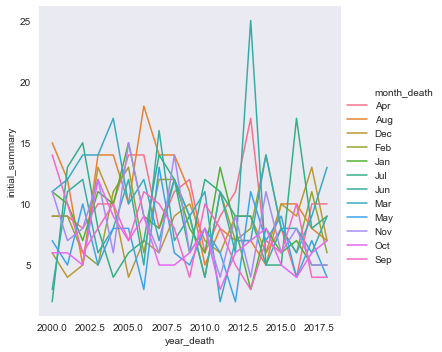

In [238]:
g = sns.relplot(data=death_by_month, x='year_death', y='initial_summary', hue='month_death', kind='line')
plt.show(g)

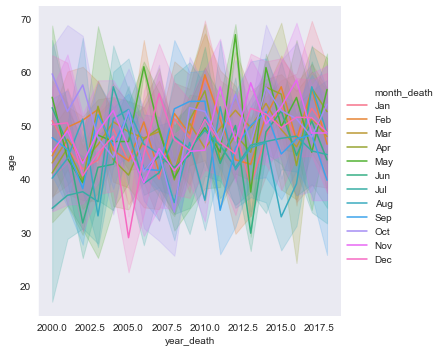

In [226]:
g = sns.relplot(data=fire, x='year_death', y='age', hue='month_death', kind='line')
plt.show(g)
#sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

- Deaths by year
- Deaths by age
- Deaths by cause

In [227]:
fire.shape

(1948, 20)

In [228]:
2291-1931.000000

360.0